In [1]:
import openmc

In [2]:
uo2 = openmc.Material(1, "uo2")
uo2.add_element('U', 1.0, enrichment = 1.5)
uo2.add_element('O', 2.0)
uo2.set_density('g/cc', 10.0)

zircaloy = openmc.Material(name='Zircaloy')
zircaloy.set_density('g/cm3', 6.55)
zircaloy.add_nuclide('Zr90', 7.2758e-3)

steel = openmc.Material(name = 'Stainless Steel')
steel.set_density('g/cm3', 8.00)
steel.add_element('C', 0.08, percent_type = 'wo')
steel.add_element('Si', 1.00, percent_type = 'wo')
steel.add_element('Mn', 2.00, percent_type = 'wo')
steel.add_element('P', 0.045, percent_type = 'wo')
steel.add_element('S', 0.030, percent_type = 'wo')
steel.add_element('Cr', 20.0, percent_type = 'wo')
steel.add_element('Ni', 11.0, percent_type = 'wo')
steel.add_element('Fe', 65.845, percent_type = 'wo')

water = openmc.Material(name='Water')
water.set_density('g/cm3', 0.76)
water.add_element('H', 2)
water.add_element('O', 1)

b4c = openmc.Material(name = 'B4C')
b4c.set_density('g/cm3', 0.7 * 2.52)
b4c.add_element('B', 4)
b4c.add_element('C', 1)

graphite = openmc.Material(name = 'Graphite')
graphite.set_density('g/cm3', 1.1995)
graphite.add_element('C', 1.0)

In [3]:
materials_file = openmc.Materials([uo2, water, zircaloy, steel, b4c, graphite])
materials_file.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cc" value="10.0" />
    <nuclide ao="0.0001357608215116589" name="U234" />
    <nuclide ao="0.015188933019753213" name="U235" />
    <nuclide ao="0.9846057335500163" name="U238" />
    <nuclide ao="6.957260871874558e-05" name="U236" />
    <nuclide ao="1.999242" name="O16" />
    <nuclide ao="0.000758" name="O17" />
  </material>
  <material id="2" name="Zircaloy">
    <density units="g/cm3" value="6.55" />
    <nuclide ao="0.0072758" name="Zr90" />
  </material>
  <material id="3" name="Stainless Steel">
    <density units="g/cm3" value="8.0" />
    <nuclide name="C0" wo="0.08" />
    <nuclide name="Si28" wo="0.9187351728295046" />
    <nuclide name="Si29" wo="0.04831750292845674" />
    <nuclide name="Si30" wo="0.03294732424203873" />
    <nuclide name="Mn55" wo="2.0" />
    <nuclide name="P31" wo="0.045" />
    <nuclide name="S32" wo="0.028430583242477884" />
   

Defining Geometries

In [4]:
A = 0.2032
B = 13.40612
C = 0.9652
D = 0.08128
E = 1.22682
F = 1.06426
G = 1.0414
H = 1.50114
I = 1.34874
J = 04.0132
K = 12.3825
L = 0.6604
M = 1.6256
N = 0.39878
O = 0.40132
P = 0.26162
Q = 0.71374
R = 0.71374
S = 30.48
T = 2.8575

In [5]:
bottom = openmc.ZPlane(z0 = -1.0, boundary_type = 'reflective')
top = openmc.ZPlane(z0 = 1.0, boundary_type = 'reflective')

In [6]:
pitch = M
pin_cell_box = openmc.rectangular_prism(width=pitch, height=pitch)

Fuel Pin Cell

In [7]:
fuel_or = openmc.ZCylinder(r=(1.0414/2), name = 'Fuel OR')
fclad_ir = openmc.ZCylinder(r=(1.06426/2), name = 'Clad IR')
fclad_or = openmc.ZCylinder(r=(1.22682/2), name = 'Clad OR')

fuel_region = -fuel_or 
gap_region = +fuel_or & -fclad_ir
fclad_region = +fclad_ir & -fclad_or
fwater_region = pin_cell_box & +fclad_or

In [8]:
fuel_cell = openmc.Cell(1, 'fuel')
fuel_cell.fill = uo2
fuel_cell.region = fuel_region 

gap_cell = openmc.Cell(2, 'air gap')
gap_cell.region = gap_region

clad_cell = openmc.Cell(3, 'clad')
clad_cell.fill = zircaloy
clad_cell.region = fclad_region

fwater_cell = openmc.Cell(4, 'fwater')
fwater_cell.fill = water
fwater_cell.region = fwater_region

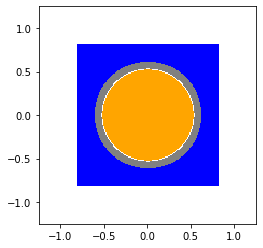

In [9]:
fuel_pin_universe = openmc.Universe(cells=[fuel_cell, gap_cell, clad_cell, fwater_cell])
fuel_pin_universe.plot(width=(2.5, 2.5), colors = {fuel_cell: 'orange', gap_cell: 'white', clad_cell: 'grey', fwater_cell: 'blue'})
#fuel_pin_universe.plot(width = (2.5, 2.5), basis = 'xz')

Water Pin Cell

In [10]:
water_or = openmc.ZCylinder(r = (1.34874/2))
wclad_or = openmc.ZCylinder(r = (1.50114/2))

wwater_inner_region = -water_or
wclad_region = -wclad_or & +water_or 
wwater_outer_region = pin_cell_box & +wclad_or

In [11]:
wwater_inner_cell = openmc.Cell(5, 'wwater_inner')
wwater_inner_cell.region = wwater_inner_region
wwater_inner_cell.fill = water

wclad_cell = openmc.Cell(6, 'wclad')
wclad_cell.fill = zircaloy
wclad_cell.region = wclad_region 

wwater_outer_cell = openmc.Cell(7, 'wwater_outer')
wwater_outer_cell.fill = water
wwater_outer_cell.region = wwater_outer_region

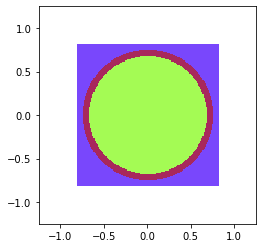

In [12]:
water_pin_universe = openmc.Universe(cells=[wwater_inner_cell, wclad_cell, wwater_outer_cell])
water_pin_universe.plot(width = (2.5, 2.5))
#water_pin_universe.plot(width = (2.5, 2.5), basis = 'xz')

CORNER PIN CELL

In [13]:
corner_fuel_or = openmc.ZCylinder(r=(1.0414/2), name = 'Corner Cell: Fuel OR')
corner_clad_ir = openmc.ZCylinder(r=(1.06426/2), name = 'Corner Cell: Clad IR')
corner_clad_or = openmc.ZCylinder(r=(1.22682/2), name = 'Corner Cell: Clad OR')

corner_fuel_cell = openmc.Cell(name = 'fuel')
corner_fuel_cell.fill = uo2
corner_fuel_cell.region = -corner_fuel_or 

corner_gap_cell = openmc.Cell(name = 'air gap')
corner_gap_cell.region = -corner_clad_ir & +corner_fuel_or

corner_clad_cell = openmc.Cell(name = 'clad')
corner_clad_cell.fill = zircaloy
corner_clad_cell.region = +corner_clad_ir & -corner_clad_or

Defining Assembly

In [14]:
margin = 1e-8

sleave_thickness = 0.2032
sleave_inner_radius = 0.9652 + margin

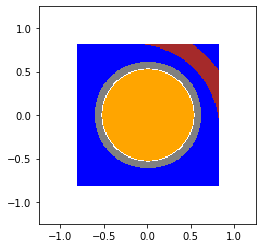

In [15]:
ur_corner_fuel_or = openmc.ZCylinder(r=(1.0414/2), name = 'ur Corner Cell: Fuel OR')
ur_corner_clad_ir = openmc.ZCylinder(r=(1.06426/2), name = 'ur Corner Cell: Clad IR')
ur_corner_clad_or = openmc.ZCylinder(r=(1.22682/2), name = 'ur Corner Cell: Clad OR')

ur_corner_fuel_cell = openmc.Cell(name = 'ur fuel')
ur_corner_fuel_cell.fill = uo2
ur_corner_fuel_cell.region = -ur_corner_fuel_or 

ur_corner_gap_cell = openmc.Cell(name = 'ul air gap')
ur_corner_gap_cell.region = -ur_corner_clad_ir & +ur_corner_fuel_or

ur_corner_clad_cell = openmc.Cell(name = 'ul clad')
ur_corner_clad_cell.fill = zircaloy
ur_corner_clad_cell.region = +ur_corner_clad_ir & -ur_corner_clad_or
#########

ur_sleave_ir = openmc.ZCylinder(x0 = pitch/2 - sleave_inner_radius - margin, y0 = pitch/2 - sleave_inner_radius + margin, r = sleave_inner_radius) #Shouldn't have margin
ur_sleave_or = openmc.ZCylinder(x0 = pitch/2 - sleave_inner_radius - margin, y0 = pitch/2 - sleave_inner_radius + margin, r = sleave_inner_radius + sleave_thickness)

ur_sleave_hor_bound = openmc.XPlane(x0 = pitch/2 - sleave_inner_radius - margin)
ur_sleave_ver_bound = openmc.YPlane(y0 = pitch/2 - sleave_inner_radius + margin)

ur_sleave_cell = openmc.Cell(name = 'ur sleave cell')
ur_sleave_cell.region = -ur_sleave_or & +ur_sleave_ir & +ur_sleave_hor_bound & +ur_sleave_ver_bound & pin_cell_box
ur_sleave_cell.fill = zircaloy

ur_sleave_water_cell = openmc.Cell(name = 'ur sleave water')
ur_sleave_water_cell.region = pin_cell_box & +ur_sleave_hor_bound & +ur_sleave_ver_bound & +ur_sleave_or
ur_sleave_water_cell.fill = water

ur_sleave_ver_water_cell = openmc.Cell(name = 'ur vertically-equivalent sleave water')
ur_sleave_ver_water_cell.region = pin_cell_box & -ur_sleave_hor_bound & +ur_sleave_ver_bound & +ur_sleave_ir
ur_sleave_ver_water_cell.fill = water 

ur_opposite_water_cell = openmc.Cell(name = 'ur opposite water')
ur_opposite_water_cell.region = pin_cell_box & -ur_sleave_hor_bound & -ur_sleave_ver_bound & +ur_sleave_ir
ur_opposite_water_cell.fill = water 

ur_sleave_hor_water_cell = openmc.Cell(name = 'ur horizontally-equivalent sleave water')
ur_sleave_hor_water_cell.region = pin_cell_box & +ur_sleave_hor_bound & -ur_sleave_ver_bound & +ur_sleave_ir
ur_sleave_hor_water_cell.fill = water 

ur_inner_water_cell = openmc.Cell(name = 'ur inner water cell')
ur_inner_water_cell.region = pin_cell_box & -ur_sleave_ir & +ur_corner_clad_or
ur_inner_water_cell.fill = water

ur_corner_pin_universe = openmc.Universe(cells=[ur_corner_fuel_cell, ur_corner_gap_cell, ur_corner_clad_cell, ur_sleave_cell, ur_inner_water_cell, ur_sleave_water_cell, ur_sleave_ver_water_cell, ur_opposite_water_cell, ur_sleave_hor_water_cell])
ur_corner_pin_universe.plot(width=(2.5, 2.5), basis = 'xy', colors = {ur_corner_fuel_cell: 'orange', ur_corner_gap_cell: 'white', ur_corner_clad_cell: 'grey', ur_sleave_cell:'brown', ur_inner_water_cell: 'blue', ur_sleave_water_cell: 'blue', ur_sleave_ver_water_cell: 'blue', ur_opposite_water_cell: 'blue', ur_sleave_hor_water_cell: 'blue'})

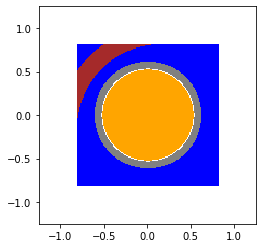

In [16]:
ul_corner_fuel_or = openmc.ZCylinder(r=(1.0414/2), name = 'ul Corner Cell: Fuel OR')
ul_corner_clad_ir = openmc.ZCylinder(r=(1.06426/2), name = 'ul Corner Cell: Clad IR')
ul_corner_clad_or = openmc.ZCylinder(r=(1.22682/2), name = 'ul Corner Cell: Clad OR')

ul_corner_fuel_cell = openmc.Cell(name = 'ul fuel')
ul_corner_fuel_cell.fill = uo2
ul_corner_fuel_cell.region = -ul_corner_fuel_or 

ul_corner_gap_cell = openmc.Cell(name = 'ul air gap')
ul_corner_gap_cell.region = -ul_corner_clad_ir & +ul_corner_fuel_or

ul_corner_clad_cell = openmc.Cell(name = 'ul clad')
ul_corner_clad_cell.fill = zircaloy
ul_corner_clad_cell.region = +ul_corner_clad_ir & -ul_corner_clad_or
######

ul_sleave_ir = openmc.ZCylinder(x0 = -pitch/2 + sleave_inner_radius + margin, y0 = pitch/2 - sleave_inner_radius + margin, r = sleave_inner_radius) #Shouldn't have margin
ul_sleave_or = openmc.ZCylinder(x0 = -pitch/2 + sleave_inner_radius + margin, y0 = pitch/2 - sleave_inner_radius + margin, r = sleave_inner_radius + sleave_thickness)

ul_sleave_hor_bound = openmc.XPlane(x0 = -pitch/2 + sleave_inner_radius + margin)
ul_sleave_ver_bound = openmc.YPlane(y0 = pitch/2 - sleave_inner_radius + margin)

ul_sleave_cell = openmc.Cell(name = 'ul sleave cell')
ul_sleave_cell.region = -ul_sleave_or & +ul_sleave_ir & -ul_sleave_hor_bound & +ul_sleave_ver_bound & pin_cell_box
ul_sleave_cell.fill = zircaloy

ul_sleave_water_cell = openmc.Cell(name = 'ul sleave water')
ul_sleave_water_cell.region = pin_cell_box & -ul_sleave_hor_bound & +ul_sleave_ver_bound & +ul_sleave_or
ul_sleave_water_cell.fill = water

ul_sleave_ver_water_cell = openmc.Cell(name = 'ul vertically-equivalent sleave water')
ul_sleave_ver_water_cell.region = pin_cell_box & +ul_sleave_hor_bound & +ul_sleave_ver_bound & +ul_sleave_ir
ul_sleave_ver_water_cell.fill = water 

ul_opposite_water_cell = openmc.Cell(name = 'ul opposite water')
ul_opposite_water_cell.region = pin_cell_box & +ul_sleave_hor_bound & -ul_sleave_ver_bound & +ul_sleave_ir
ul_opposite_water_cell.fill = water 

ul_sleave_hor_water_cell = openmc.Cell(name = 'ul horizontally-equivalent sleave water')
ul_sleave_hor_water_cell.region = pin_cell_box & -ul_sleave_hor_bound & -ul_sleave_ver_bound & +ul_sleave_ir
ul_sleave_hor_water_cell.fill = water 

ul_inner_water_cell = openmc.Cell(name = 'ul inner water cell')
ul_inner_water_cell.region = pin_cell_box & -ul_sleave_ir & +ul_corner_clad_or
ul_inner_water_cell.fill = water

ul_corner_pin_universe = openmc.Universe(cells=[ul_corner_fuel_cell, ul_corner_gap_cell, ul_corner_clad_cell, ul_sleave_cell, ul_inner_water_cell, ul_sleave_water_cell, ul_sleave_ver_water_cell, ul_opposite_water_cell, ul_sleave_hor_water_cell])
ul_corner_pin_universe.plot(width=(2.5, 2.5), basis = 'xy', colors = {ul_corner_fuel_cell: 'orange', ul_corner_gap_cell: 'white', ul_corner_clad_cell: 'grey', ul_sleave_cell:'brown', ul_inner_water_cell: 'blue', ul_sleave_water_cell: 'blue', ul_sleave_ver_water_cell: 'blue', ul_opposite_water_cell: 'blue', ul_sleave_hor_water_cell: 'blue'})

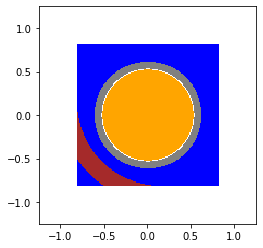

In [17]:
ll_corner_fuel_or = openmc.ZCylinder(r=(1.0414/2), name = 'll Corner Cell: Fuel OR')
ll_corner_clad_ir = openmc.ZCylinder(r=(1.06426/2), name = 'll Corner Cell: Clad IR')
ll_corner_clad_or = openmc.ZCylinder(r=(1.22682/2), name = 'll Corner Cell: Clad OR')

ll_corner_fuel_cell = openmc.Cell(name = 'll fuel')
ll_corner_fuel_cell.fill = uo2
ll_corner_fuel_cell.region = -ll_corner_fuel_or 

ll_corner_gap_cell = openmc.Cell(name = 'll air gap')
ll_corner_gap_cell.region = -ll_corner_clad_ir & +ll_corner_fuel_or

ll_corner_clad_cell = openmc.Cell(name = 'll clad')
ll_corner_clad_cell.fill = zircaloy
ll_corner_clad_cell.region = +ll_corner_clad_ir & -ll_corner_clad_or
######

ll_sleave_ir = openmc.ZCylinder(x0 = -pitch/2 + sleave_inner_radius + margin, y0 = -pitch/2 + sleave_inner_radius - margin, r = sleave_inner_radius) #Shouldn't have margin
ll_sleave_or = openmc.ZCylinder(x0 = -pitch/2 + sleave_inner_radius + margin, y0 = -pitch/2 + sleave_inner_radius - margin, r = sleave_inner_radius + sleave_thickness)

ll_sleave_hor_bound = openmc.XPlane(x0 = -pitch/2 + sleave_inner_radius + margin)
ll_sleave_ver_bound = openmc.YPlane(y0 = -pitch/2 + sleave_inner_radius - margin)

ll_sleave_cell = openmc.Cell(name = 'ul sleave cell')
ll_sleave_cell.region = -ll_sleave_or & +ll_sleave_ir & -ll_sleave_hor_bound & -ll_sleave_ver_bound & pin_cell_box
ll_sleave_cell.fill = zircaloy

ll_sleave_water_cell = openmc.Cell(name = 'ul sleave water')
ll_sleave_water_cell.region = pin_cell_box & -ll_sleave_hor_bound & -ll_sleave_ver_bound & +ll_sleave_or
ll_sleave_water_cell.fill = water

ll_sleave_ver_water_cell = openmc.Cell(name = 'ul vertically-equivalent sleave water')
ll_sleave_ver_water_cell.region = pin_cell_box & +ll_sleave_hor_bound & -ll_sleave_ver_bound & +ll_sleave_ir
ll_sleave_ver_water_cell.fill = water 

ll_opposite_water_cell = openmc.Cell(name = 'ul opposite water')
ll_opposite_water_cell.region = pin_cell_box & +ll_sleave_hor_bound & +ll_sleave_ver_bound & +ll_sleave_ir
ll_opposite_water_cell.fill = water 

ll_sleave_hor_water_cell = openmc.Cell(name = 'ul horizontally-equivalent sleave water')
ll_sleave_hor_water_cell.region = pin_cell_box & -ll_sleave_hor_bound & +ll_sleave_ver_bound & +ll_sleave_ir
ll_sleave_hor_water_cell.fill = water 

ll_inner_water_cell = openmc.Cell(name = 'ul inner water cell')
ll_inner_water_cell.region = pin_cell_box & -ll_sleave_ir & +ll_corner_clad_or
ll_inner_water_cell.fill = water

ll_corner_pin_universe = openmc.Universe(cells=[ll_corner_fuel_cell, ll_corner_gap_cell, ll_corner_clad_cell, ll_sleave_cell, ll_inner_water_cell, ll_sleave_water_cell, ll_sleave_ver_water_cell, ll_opposite_water_cell, ll_sleave_hor_water_cell])
ll_corner_pin_universe.plot(width=(2.5, 2.5), basis = 'xy', colors = {ll_corner_fuel_cell: 'orange', ll_corner_gap_cell: 'white', ll_corner_clad_cell: 'grey', ll_sleave_cell:'brown', ll_inner_water_cell: 'blue', ll_sleave_water_cell: 'blue', ll_sleave_ver_water_cell: 'blue', ll_opposite_water_cell: 'blue', ll_sleave_hor_water_cell: 'blue'})

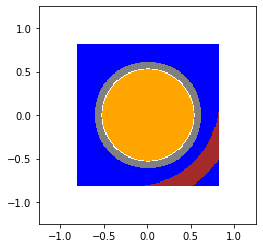

In [18]:
lr_corner_fuel_or = openmc.ZCylinder(r=(1.0414/2), name = 'lr Corner Cell: Fuel OR')
lr_corner_clad_ir = openmc.ZCylinder(r=(1.06426/2), name = 'lr Corner Cell: Clad IR')
lr_corner_clad_or = openmc.ZCylinder(r=(1.22682/2), name = 'lr Corner Cell: Clad OR')

lr_corner_fuel_cell = openmc.Cell(name = 'lr fuel')
lr_corner_fuel_cell.fill = uo2
lr_corner_fuel_cell.region = -lr_corner_fuel_or 

lr_corner_gap_cell = openmc.Cell(name = 'lr air gap')
lr_corner_gap_cell.region = -lr_corner_clad_ir & +lr_corner_fuel_or

lr_corner_clad_cell = openmc.Cell(name = 'lr clad')
lr_corner_clad_cell.fill = zircaloy
lr_corner_clad_cell.region = +lr_corner_clad_ir & -lr_corner_clad_or
######

lr_sleave_ir = openmc.ZCylinder(x0 = pitch/2 - sleave_inner_radius - margin, y0 = -pitch/2 + sleave_inner_radius - margin, r = sleave_inner_radius) #Shouldn't have margin
lr_sleave_or = openmc.ZCylinder(x0 = pitch/2 - sleave_inner_radius - margin, y0 = -pitch/2 + sleave_inner_radius - margin, r = sleave_inner_radius + sleave_thickness)

lr_sleave_hor_bound = openmc.XPlane(x0 = pitch/2 - sleave_inner_radius - margin)
lr_sleave_ver_bound = openmc.YPlane(y0 = -pitch/2 + sleave_inner_radius - margin)

lr_sleave_cell = openmc.Cell(name = 'ur sleave cell')
lr_sleave_cell.region = -lr_sleave_or & +lr_sleave_ir & +lr_sleave_hor_bound & -lr_sleave_ver_bound & pin_cell_box
lr_sleave_cell.fill = zircaloy

lr_sleave_water_cell = openmc.Cell(name = 'ur sleave water')
lr_sleave_water_cell.region = pin_cell_box & +lr_sleave_hor_bound & -lr_sleave_ver_bound & +lr_sleave_or
lr_sleave_water_cell.fill = water

lr_sleave_ver_water_cell = openmc.Cell(name = 'ur vertically-equivalent sleave water')
lr_sleave_ver_water_cell.region = pin_cell_box & -lr_sleave_hor_bound & -lr_sleave_ver_bound & +lr_sleave_ir
lr_sleave_ver_water_cell.fill = water 

lr_opposite_water_cell = openmc.Cell(name = 'ur opposite water')
lr_opposite_water_cell.region = pin_cell_box & -lr_sleave_hor_bound & +lr_sleave_ver_bound & +lr_sleave_ir
lr_opposite_water_cell.fill = water 

lr_sleave_hor_water_cell = openmc.Cell(name = 'ur horizontally-equivalent sleave water')
lr_sleave_hor_water_cell.region = pin_cell_box & +lr_sleave_hor_bound & +lr_sleave_ver_bound & +lr_sleave_ir
lr_sleave_hor_water_cell.fill = water 

lr_inner_water_cell = openmc.Cell(name = 'ur inner water cell')
lr_inner_water_cell.region = pin_cell_box & -lr_sleave_ir & +lr_corner_clad_or
lr_inner_water_cell.fill = water

lr_corner_pin_universe = openmc.Universe(cells=[lr_corner_fuel_cell, lr_corner_gap_cell, lr_corner_clad_cell, lr_sleave_cell, lr_inner_water_cell, lr_sleave_water_cell, lr_sleave_ver_water_cell, lr_opposite_water_cell, lr_sleave_hor_water_cell])
lr_corner_pin_universe.plot(width=(2.5, 2.5), basis = 'xy', colors = {lr_corner_fuel_cell: 'orange', lr_corner_gap_cell: 'white', lr_corner_clad_cell: 'grey', lr_sleave_cell:'brown', lr_inner_water_cell: 'blue', lr_sleave_water_cell: 'blue', lr_sleave_ver_water_cell: 'blue', lr_opposite_water_cell: 'blue', lr_sleave_hor_water_cell: 'blue'})

/Users/ryanyang/codes/openmc/openmc/surface.py:1511: FutureWarning: "ZCylinder(...) accepts an argument named 'r', not 'R'. Future versions of OpenMC will not accept the capitalized version.
  FutureWarning)


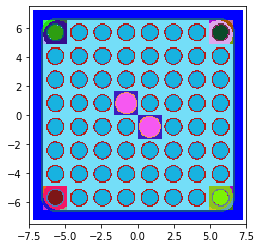

In [19]:
quarter_pitch = pitch * 8

assembly = openmc.RectLattice(name = 'Quarter Assembly')
assembly.pitch = (pitch, pitch)
assembly.lower_left = [-quarter_pitch/2, -quarter_pitch/2]

#assembly.universes = [
#    [ul_corner_pin_universe, ur_corner_pin_universe],
#    [ll_corner_pin_universe, lr_corner_pin_universe]
#]

assembly.universes = [
                      [ul_corner_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, ur_corner_pin_universe],
                      [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe],
                      [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe],
                      [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, water_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe],
                      [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, water_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe],
                      [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe],
                      [fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe],
                      [ll_corner_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, fuel_pin_universe, lr_corner_pin_universe]
]

assembly_region = openmc.rectangular_prism(width = quarter_pitch, height = quarter_pitch, origin = (0,0))
assembly_cell = openmc.Cell(name = 'quarter assembly cell', fill = assembly, region = assembly_region)

assembly_sleave = openmc.Cell(name = 'quarter assembly sleave')
assembly_sleave.region = openmc.rectangular_prism(width = quarter_pitch + 2*sleave_thickness, height = quarter_pitch + 2*sleave_thickness, corner_radius = sleave_inner_radius + sleave_thickness) & ~assembly_cell.region
assembly_sleave.fill = zircaloy

assembly_outer_water = openmc.Cell(name = 'assembly outer water')
assembly_outer_water.region = ~assembly_sleave.region & ~assembly_cell.region & openmc.rectangular_prism(width = quarter_pitch + 2*sleave_thickness + 1, height = quarter_pitch + 2*sleave_thickness + 1, boundary_type = 'reflective')
assembly_outer_water.fill = water

quarter_assembly_universe = openmc.Universe(cells=[assembly_cell, assembly_sleave, assembly_outer_water])
quarter_assembly_universe.plot(width=(15,15), colors = {assembly_outer_water: 'blue'})

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="1" material="1" name="fuel" region="-7" universe="1" />
  <cell id="2" material="void" name="air gap" region="7 -8" universe="1" />
  <cell id="3" material="2" name="clad" region="8 -9" universe="1" />
  <cell id="4" material="4" name="fwater" region="3 -4 5 -6 9" universe="1" />
  <cell id="5" material="4" name="wwater_inner" region="-10" universe="2" />
  <cell id="6" material="2" name="wclad" region="-11 10" universe="2" />
  <cell id="7" material="4" name="wwater_outer" region="3 -4 5 -6 11" universe="2" />
  <cell id="11" material="1" name="ur fuel" region="-15" universe="3" />
  <cell id="12" material="void" name="ul air gap" region="-16 15" universe="3" />
  <cell id="13" material="2" name="ul clad" region="16 -17" universe="3" />
  <cell id="14" material="2" name="ur sleave cell" region="-19 18 20 21 3 -4 5 -6" universe="3" />
  <cell id="15" material="4" name="ur sleave water" region="3 -4 5 -6 20 21 19" universe="3

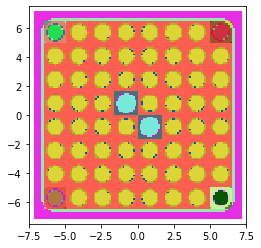

In [20]:
root = quarter_assembly_universe
root.plot(width = (15,15), basis = 'xy', pixels = (128, 128))
geom = openmc.Geometry(root)
geom.export_to_xml()
!cat geometry.xml


Defining Settings

In [21]:
point = openmc.stats.Point((0, 0, 0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.inactive = 10
settings.particles = 1000
settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="point">
      <parameters>0 0 0</parameters>
    </space>
  </source>
</settings>


In [22]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

       80/1    1.17946    1.21784 +/- 0.00481
       81/1    1.23920    1.21815 +/- 0.00476
       82/1    1.24155    1.21847 +/- 0.00470
       83/1    1.26286    1.21908 +/- 0.00467
       84/1    1.15865    1.21826 +/- 0.00468
       85/1    1.19933    1.21801 +/- 0.00463
       86/1    1.19135    1.21766 +/- 0.00458
       87/1    1.20925    1.21755 +/- 0.00452
       88/1    1.21471    1.21751 +/- 0.00446
       89/1    1.20975    1.21742 +/- 0.00441
       90/1    1.23637    1.21765 +/- 0.00436
       91/1    1.19041    1.21732 +/- 0.00432
       92/1    1.25926    1.21783 +/- 0.00429
       93/1    1.22510    1.21791 +/- 0.00424
       94/1    1.20423    1.21775 +/- 0.00420
       95/1    1.21771    1.21775 +/- 0.00415
       96/1    1.30371    1.21875 +/- 0.00422
       97/1    1.21747    1.21874 +/- 0.00417
       98/1    1.13599    1.21780 +/- 0.00423
       99/1    1.23754    1.21802 +/- 0.00419
      100/1    1.10095    1.21672 +/- 0.00434
 Creating state point statepoint.1